In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


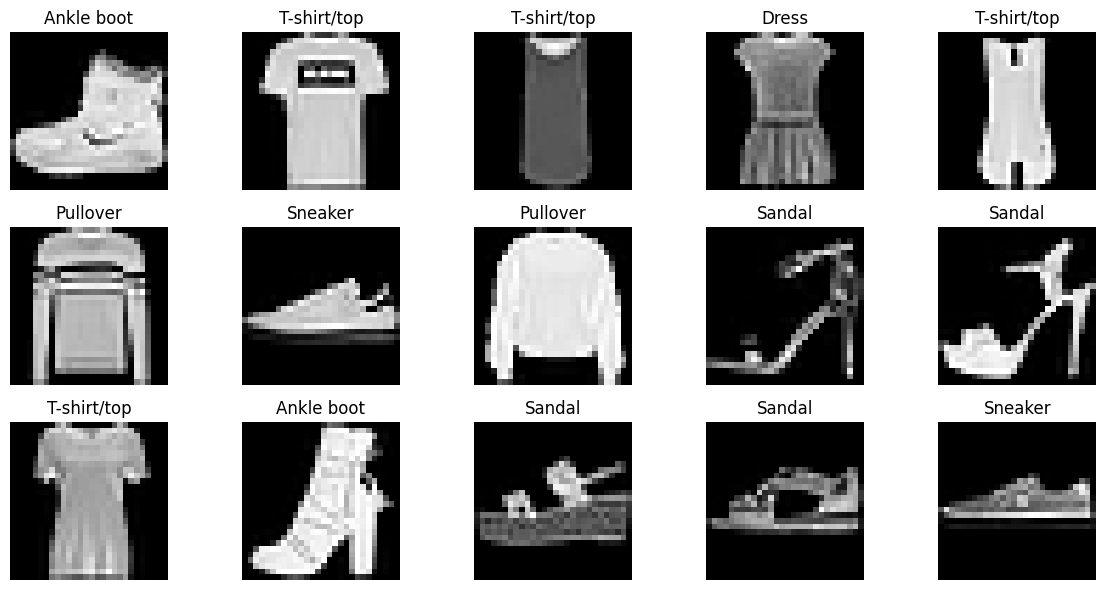

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터를 나눠서 픽셀값을 0~1로 변환 후에 클래스 이름을 다음과 같이 정의하시고, 이미지를 출력해주세요.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 6))
for i in range(15) :
  plt.subplot(3, 5, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(class_names[y_train[i]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print('x_train.shape):', x_train.shape)

x_train.shape): (60000, 28, 28)


In [ ]:
x_train.size

47040000

In [ ]:
x_test.size

7840000

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# number of classes

In [ ]:
print("number of classes:", len(class_names))

number of classes: 10


In [ ]:
K = len(set(y_train))
print(K)

10


In [ ]:
# Keras API 를 통해서 CNN (Convolutinal Neural Network) 모델을 만듦
# 합성곱 신경망
# 입력 -> 합성곱 계층 3개 -> Flatten -> Dense -> Droptout(과적합 방지) -> 출력 (softmax : 각각의 확률값)

In [ ]:
x_train = np.expand_dims(x_train, -1) # 28×28 => 2D, 28×28×1 => 3D, (28, 28, 1) / 2차원을 3차원으로 ~
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
# (60000, 28, 28, 1)

# 입력 데이터
i = Input(shape = x_train[0].shape)

# 합성곱 계층 3개 │ node가 많으면 많을수록 더 자세하게 나옴
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # convolutional layer 1번째
# 32개의 node(filter)가 사용. 각각의 node는 3×3 / stirdes : ndoe가 2개씩 움직임 / 비선형 데이터에 가장 많이 쓰이는 relu
# 그림을 인식해서 그 그림의 형태를 잡아가는 거
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
# activationn 함수를 통해서 더 자세하게 훑고 지나가겠구나

x = Flatten()(x) # 1D 벡터화
x = Dropout(0.2)(x) # 과적합 방지
x = Dense(512, activation='relu')(x) # 가장 많은 필터로 쭉 둘러보는 것이다..
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

(60000, 28, 28, 1)
Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.7443 - loss: 0.6976 - val_accuracy: 0.8486 - val_loss: 0.3967
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8615 - loss: 0.3686 - val_accuracy: 0.8684 - val_loss: 0.3490
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8834 - loss: 0.3098 - val_accuracy: 0.8774 - val_loss: 0.3279
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8974 - loss: 0.2760 - val_accuracy: 0.8934 - val_loss: 0.2950
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9083 - loss: 0.2402 - val_accuracy: 0.8953 - val_loss: 0.2924
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9144 - loss: 0.2228 - val_accuracy: 0.8934 - val_loss: 0.2916
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9229 - loss: 0.2051 - val_accuracy: 0.8944 - val_loss: 0.3084
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step -

In [ ]:
i

In [ ]:
I

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_10>

In [ ]:
# loss, accuracy 그래프를 그리세요
# 3차원 이미지 입력 -> 특징 추출(3개의 convolutional layer) -> 차원 축소 -> 과적합 방지 2번 -> 출력 : 다중 클래스 분류 (softmax)

In [ ]:
import matplotlib.pyplot as plt

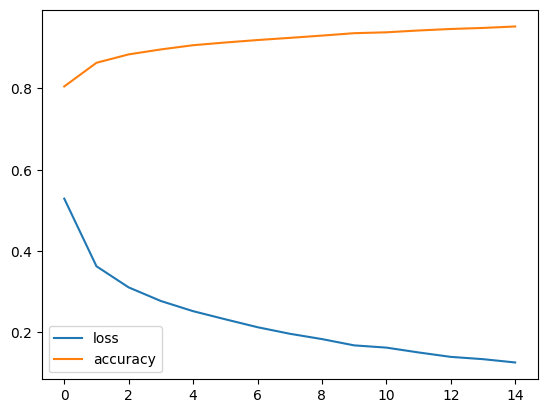

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

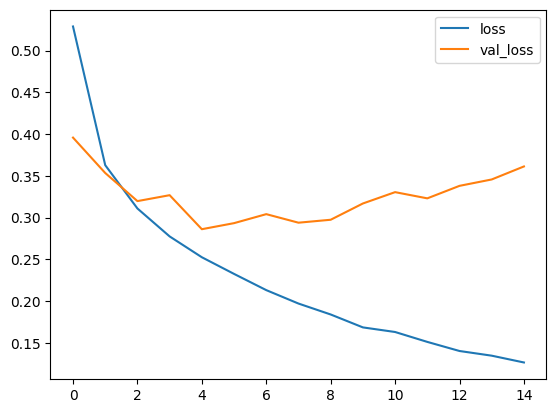

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

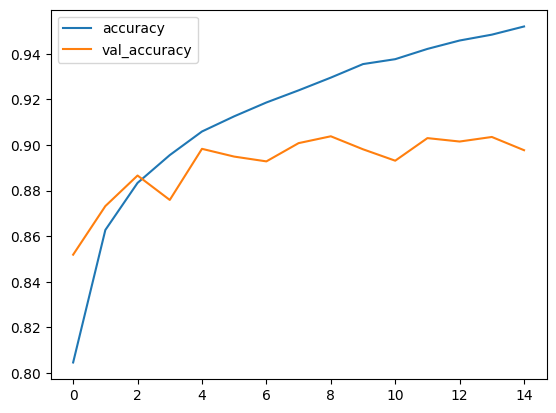

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Confusion matrix, without normalization
[[827   1  26  18   1   2 118   0   7   0]
 [  3 972   2  14   3   0   6   0   0   0]
 [ 10   0 835  10  37   0 106   0   2   0]
 [ 16   3  23 893  25   0  39   0   1   0]
 [  2   0  66  22 805   0 103   0   2   0]
 [  1   0   0   1   0 982   0  11   0   5]
 [ 92   0  50  19  75   0 756   0   8   0]
 [  0   0   0   0   0  10   0 964   0  26]
 [  4   1   3   3   3   3   8   2 972   1]
 [  0   0   0   0   0   7   1  21   0 971]]


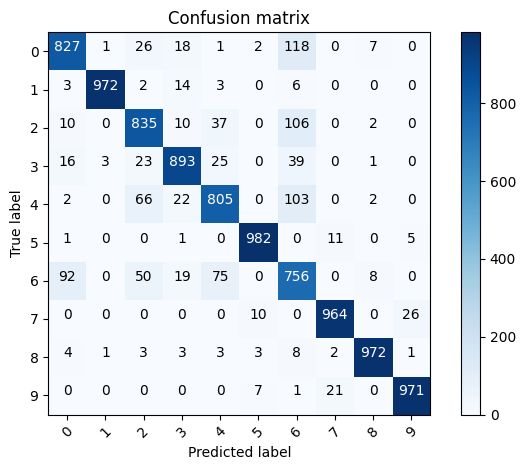

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusiont_matrix(cm, classes,
                           normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Blues):
  print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1) # [0.9, 0.2, ....] -> 0
cm = confusion_matrix(y_test, p_test)
plot_confusiont_matrix(cm, list(range(10)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


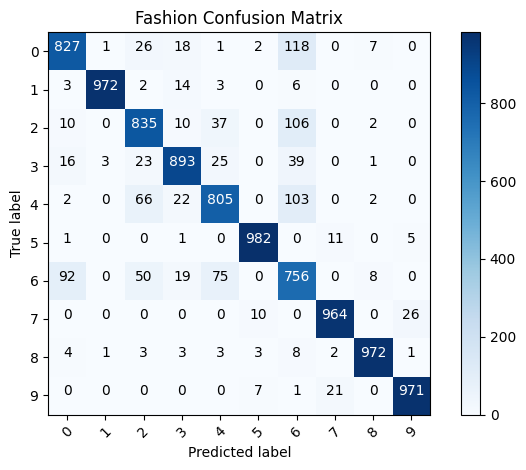

In [ ]:
def plot_confusiont_matrix(cm, classes,
                           normalize='False',
                           title='Fashion Confusion Matrix',
                           cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusiont_matrix(cm, list(range(10)))

In [ ]:
print(cm)

[[827   1  26  18   1   2 118   0   7   0]
 [  3 972   2  14   3   0   6   0   0   0]
 [ 10   0 835  10  37   0 106   0   2   0]
 [ 16   3  23 893  25   0  39   0   1   0]
 [  2   0  66  22 805   0 103   0   2   0]
 [  1   0   0   1   0 982   0  11   0   5]
 [ 92   0  50  19  75   0 756   0   8   0]
 [  0   0   0   0   0  10   0 964   0  26]
 [  4   1   3   3   3   3   8   2 972   1]
 [  0   0   0   0   0   7   1  21   0 971]]


Text(0.5, 1.0, 'True label: Sneaker Predicted: Sandal')

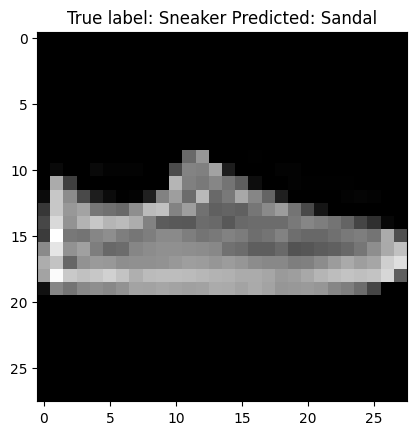

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
